In [86]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [88]:
df = pd.read_csv('C:\\Users\\Home\\Downloads\\dynamic_pricing.csv')

In [89]:

df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [90]:

df.tail()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048
999,78,63,Rural,Gold,14,4.21,Afternoon,Economy,147,655.065106


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [92]:
df.nunique()

Number_of_Riders             81
Number_of_Drivers            79
Location_Category             3
Customer_Loyalty_Status       3
Number_of_Past_Rides        101
Average_Ratings             151
Time_of_Booking               4
Vehicle_Type                  2
Expected_Ride_Duration      171
Historical_Cost_of_Ride    1000
dtype: int64

In [93]:
df.isnull().sum()


Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

In [94]:

df.columns

Index(['Number_of_Riders', 'Number_of_Drivers', 'Location_Category',
       'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings',
       'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration',
       'Historical_Cost_of_Ride'],
      dtype='object')

In [95]:
import pandas as pd
df.describe

<bound method NDFrame.describe of      Number_of_Riders  Number_of_Drivers Location_Category  \
0                  90                 45             Urban   
1                  58                 39          Suburban   
2                  42                 31             Rural   
3                  89                 28             Rural   
4                  78                 22             Rural   
..                ...                ...               ...   
995                33                 23             Urban   
996                84                 29             Urban   
997                44                  6          Suburban   
998                53                 27          Suburban   
999                78                 63             Rural   

    Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                    Silver                    13             4.47   
1                    Silver                    72             4.06   
2          

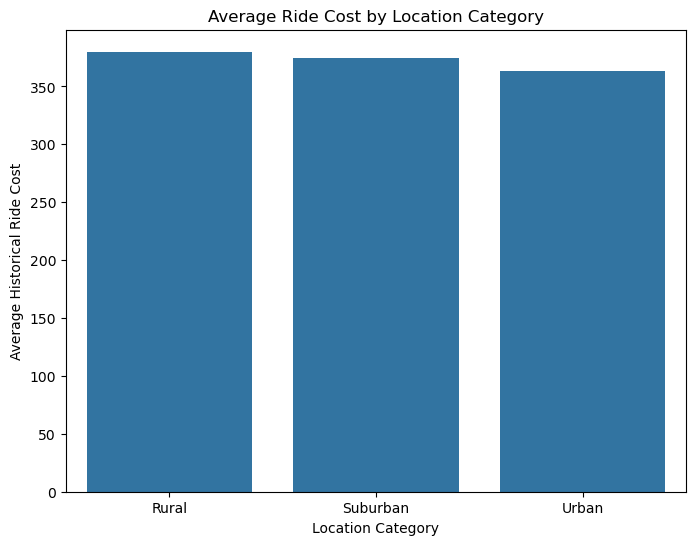

In [96]:
#Location and Pricing Analysis
location_cost = df.groupby('Location_Category')['Historical_Cost_of_Ride'].mean().reset_index()

# Plotting
plt.figure(figsize=(8,6))
sns.barplot(x='Location_Category', y='Historical_Cost_of_Ride', data=location_cost)
plt.title('Average Ride Cost by Location Category')
plt.ylabel('Average Historical Ride Cost')
plt.xlabel('Location Category')
plt.show()


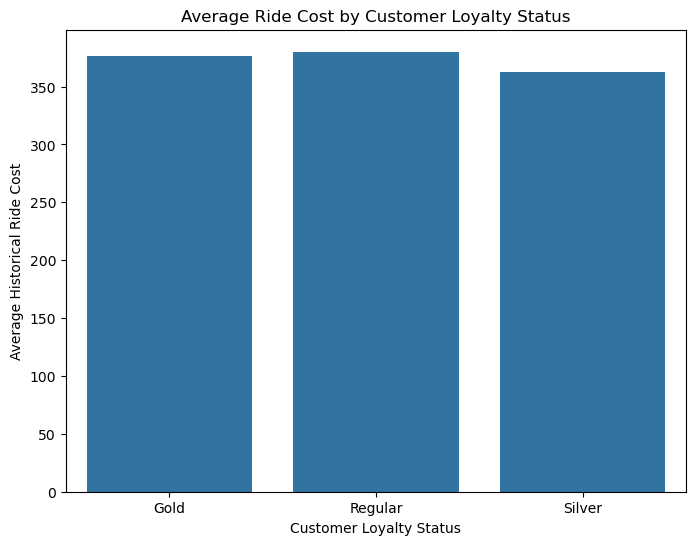

In [97]:
#Customer Loyalty vs. Ride Cost
# Group by loyalty status and calculate average ride cost
loyalty_cost = df.groupby('Customer_Loyalty_Status')['Historical_Cost_of_Ride'].mean().reset_index()

# Plotting
plt.figure(figsize=(8,6))
sns.barplot(x='Customer_Loyalty_Status', y='Historical_Cost_of_Ride', data=loyalty_cost)
plt.title('Average Ride Cost by Customer Loyalty Status')
plt.ylabel('Average Historical Ride Cost')
plt.xlabel('Customer Loyalty Status')
plt.show()


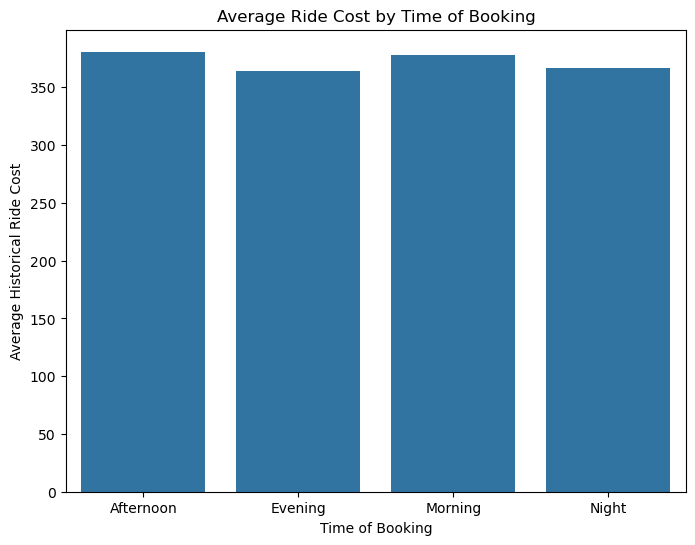

In [98]:
#Time of Booking and Cost
# Group by Time of Booking and calculate average ride cost
time_cost = df.groupby('Time_of_Booking')['Historical_Cost_of_Ride'].mean().reset_index()

# Plotting
plt.figure(figsize=(8,6))
sns.barplot(x='Time_of_Booking', y='Historical_Cost_of_Ride', data=time_cost)
plt.title('Average Ride Cost by Time of Booking')
plt.ylabel('Average Historical Ride Cost')
plt.xlabel('Time of Booking')
plt.show()


In [99]:
# Descriptive statistics
df.describe(include='all')


,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000,1000,1000.000000,1000.000000,1000,1000,1000.00000,1000.000000
unique,NaN,NaN,3,3,NaN,NaN,4,2,NaN,NaN
top,NaN,NaN,Urban,Silver,NaN,NaN,Night,Premium,NaN,NaN
freq,NaN,NaN,346,367,NaN,NaN,276,522,NaN,NaN
mean,60.372000,27.076000,NaN,NaN,50.031000,4.257220,NaN,NaN,99.58800,372.502623
std,23.701506,19.068346,NaN,NaN,29.313774,0.435781,NaN,NaN,49.16545,187.158756
min,20.000000,5.000000,NaN,NaN,0.000000,3.500000,NaN,NaN,10.00000,25.993449
25%,40.000000,11.000000,NaN,NaN,25.000000,3.870000,NaN,NaN,59.75000,221.365202
50%,60.000000,22.000000,NaN,NaN,51.000000,4.270000,NaN,NaN,102.00000,362.019426
75%,81.000000,38.000000,NaN,NaN,75.000000,4.632500,NaN,NaN,143.00000,510.497504


In [100]:

df.dtypes



Number_of_Riders             int64
Number_of_Drivers            int64
Location_Category           object
Customer_Loyalty_Status     object
Number_of_Past_Rides         int64
Average_Ratings            float64
Time_of_Booking             object
Vehicle_Type                object
Expected_Ride_Duration       int64
Historical_Cost_of_Ride    float64
dtype: object

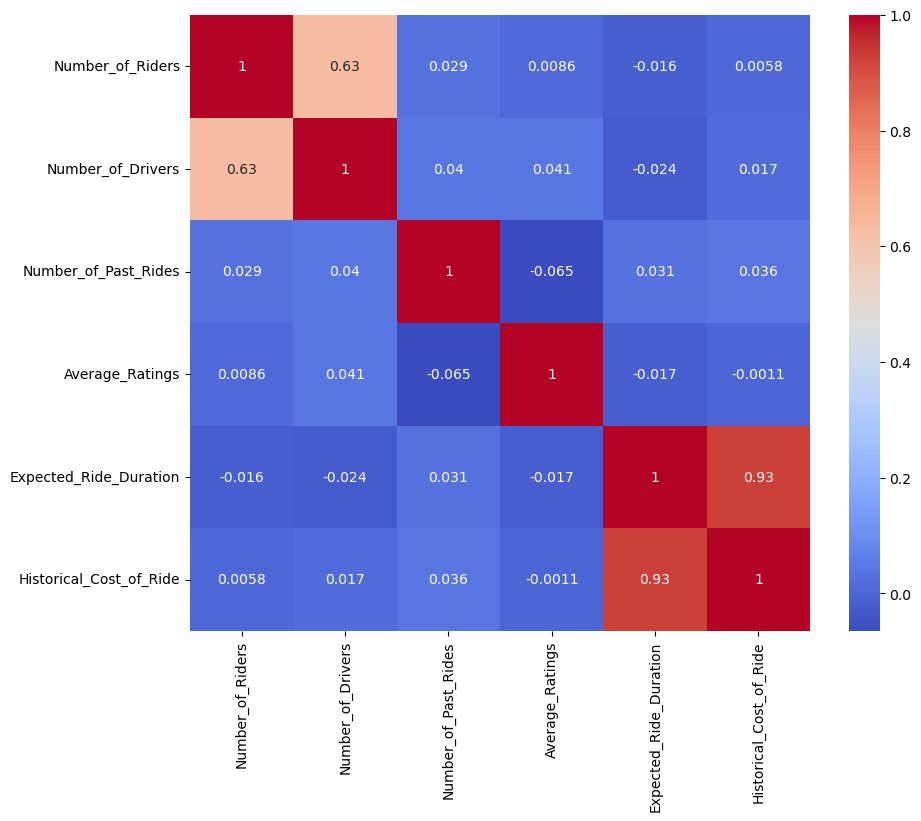

In [101]:
# Correlation matrix
numerical_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
corr_matrix = numerical_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


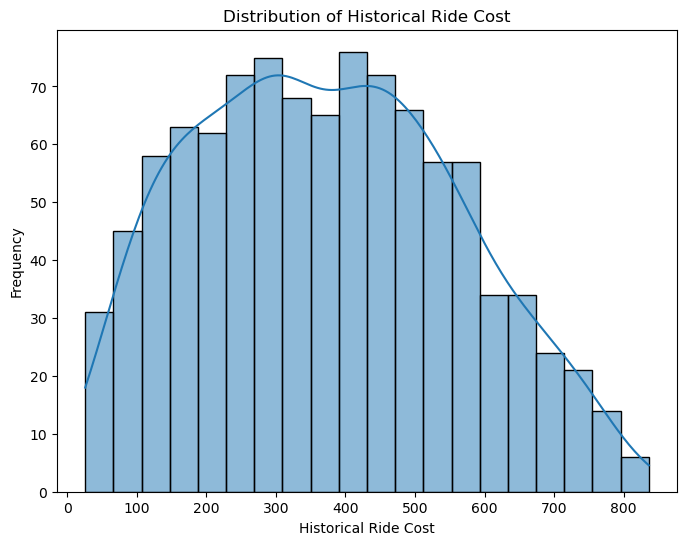

In [102]:
#DISTRIBUTION OF HISTORICAL RIDE COST
plt.figure(figsize=(8, 6))
sns.histplot(df['Historical_Cost_of_Ride'], bins=20, kde=True)
plt.title('Distribution of Historical Ride Cost')
plt.xlabel('Historical Ride Cost')
plt.ylabel('Frequency')
plt.show()


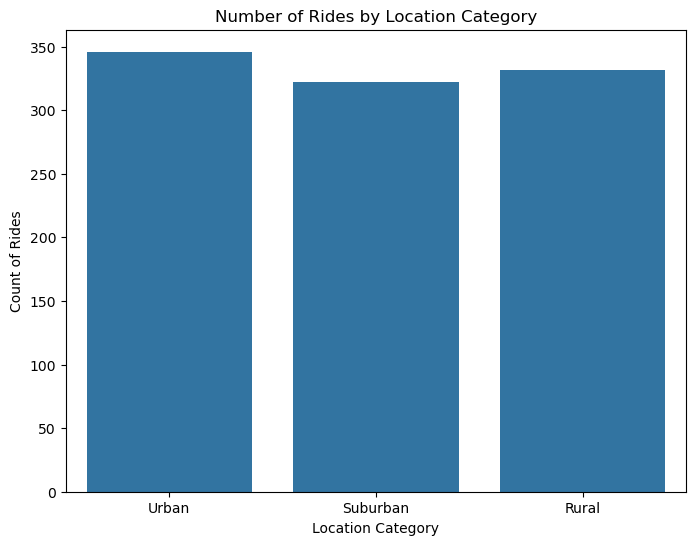

In [103]:
#NUMBER OF RIDES BY LOCATION CATEGORY
plt.figure(figsize=(8, 6))
sns.countplot(x='Location_Category', data=df)
plt.title('Number of Rides by Location Category')
plt.xlabel('Location Category')
plt.ylabel('Count of Rides')
plt.show()


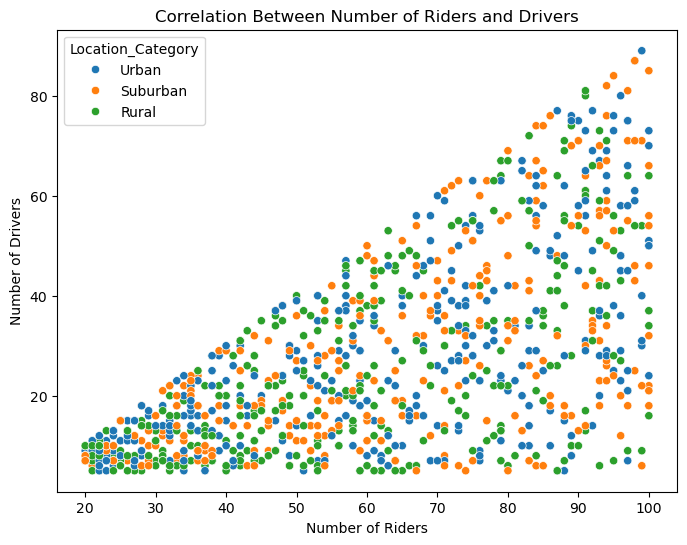

In [104]:
#CORRELATION BETWEEEN NUMBERS OF RIDERS AND DRIVERS
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Number_of_Riders', y='Number_of_Drivers', hue='Location_Category', data=df)
plt.title('Correlation Between Number of Riders and Drivers')
plt.xlabel('Number of Riders')
plt.ylabel('Number of Drivers')
plt.show()


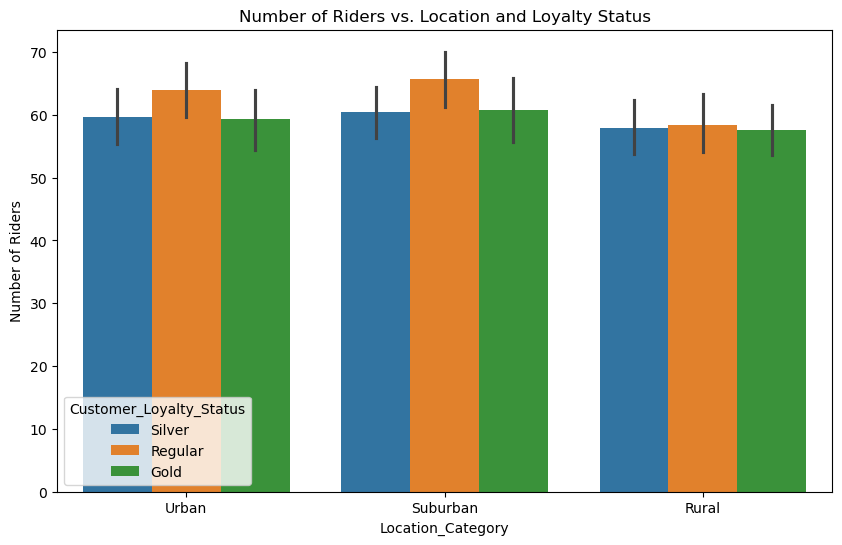

In [105]:
#NUMBER OF RIDERS VS LOCATION AND LOYALTY STATUS
plt.figure(figsize=(10, 6))
sns.barplot(x='Location_Category', y='Number_of_Riders', hue='Customer_Loyalty_Status', data=df)
plt.title('Number of Riders vs. Location and Loyalty Status')
plt.ylabel('Number of Riders')
plt.show()


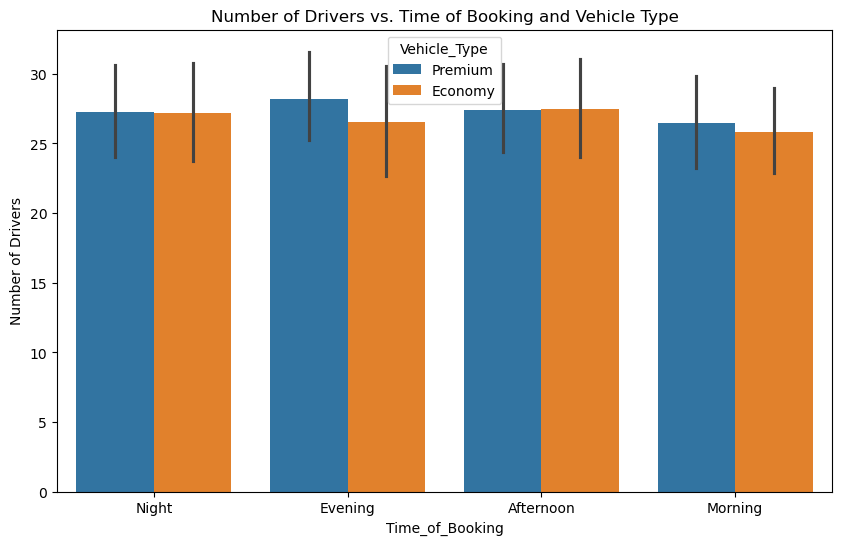

In [106]:
#NUMBER OF DRIVERS VS TIME OF BOOKING AND VEHICLE TYPE
plt.figure(figsize=(10, 6))
sns.barplot(x='Time_of_Booking', y='Number_of_Drivers', hue='Vehicle_Type', data=df)
plt.title('Number of Drivers vs. Time of Booking and Vehicle Type')
plt.ylabel('Number of Drivers')
plt.show()


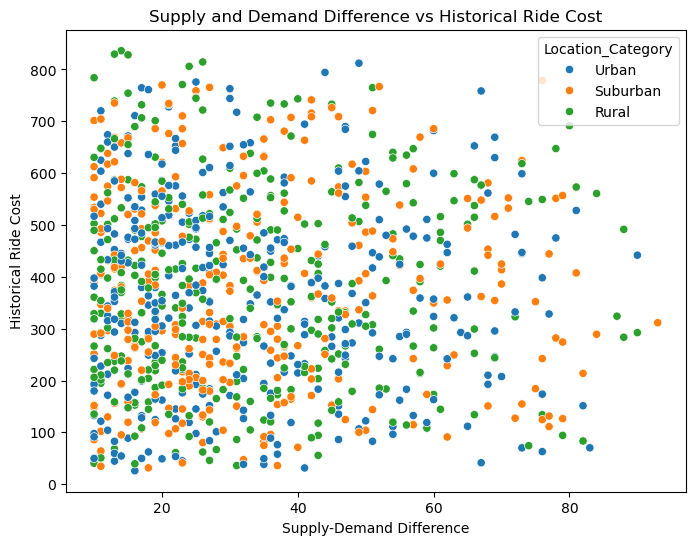

In [107]:
#SUPPLY AND DEMAND DIFFERENCE VS HISTORICAL RIDE COST
df['Supply_Demand_Diff'] = df['Number_of_Riders'] - df['Number_of_Drivers']

# Plotting Supply-Demand Difference vs Historical Cost
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Supply_Demand_Diff', y='Historical_Cost_of_Ride', hue='Location_Category', data=df)
plt.title('Supply and Demand Difference vs Historical Ride Cost')
plt.xlabel('Supply-Demand Difference')
plt.ylabel('Historical Ride Cost')
plt.show()


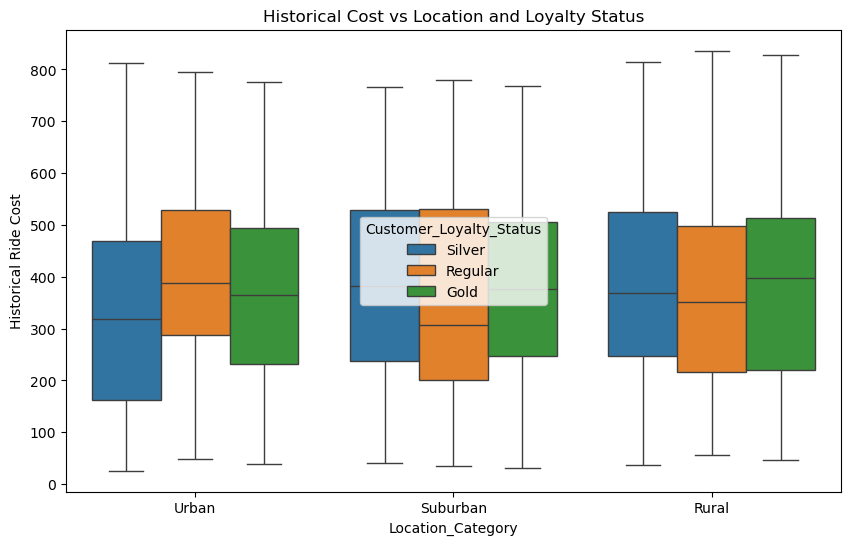

In [108]:
#HISTORICAL COST VS LOCATION AND LOYALTY STATUS
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location_Category', y='Historical_Cost_of_Ride', hue='Customer_Loyalty_Status', data=df)
plt.title('Historical Cost vs Location and Loyalty Status')
plt.ylabel('Historical Ride Cost')
plt.show()


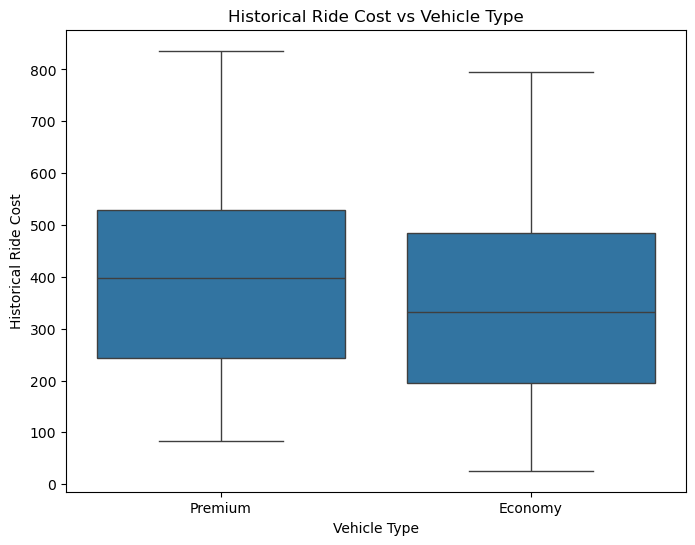

In [109]:
#HISTORICAL RIDE COST VS VEHICLE TYPE
plt.figure(figsize=(8, 6))
sns.boxplot(x='Vehicle_Type', y='Historical_Cost_of_Ride', data=df)
plt.title('Historical Ride Cost vs Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Historical Ride Cost')
plt.show()
